In [1]:
from fastai import *
from fastai.vision import *

In [17]:
bear_images_path = Path('data/bears')

np.random.seed(42)

bear_data_bunch = ImageDataBunch.from_csv(bear_images_path, folder=".", valid_pct=0.2, 
                                          csv_labels='cleaned.csv', ds_tfms=get_transforms(), 
                                          size=224, num_workers=4).normalize(imagenet_stats)

In [22]:
bear_data_bunch.classes, bear_data_bunch.c, len(bear_data_bunch.train_ds), len(bear_data_bunch.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 340, 84)

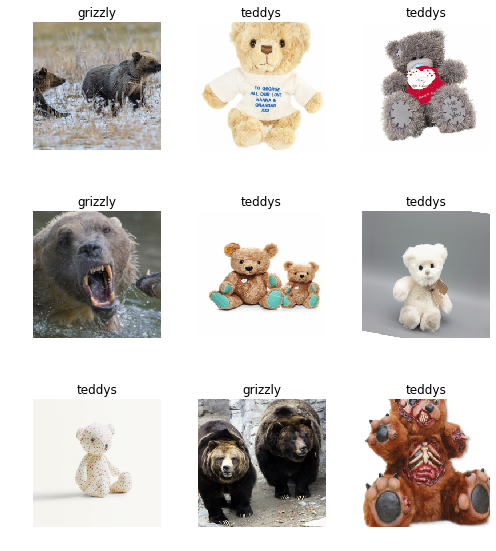

In [20]:
bear_data_bunch.show_batch(rows=3, figsize=(7, 8))

In [23]:
learn = cnn_learner(bear_data_bunch, models.resnet34, metrics=error_rate)

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.226275,0.301268,0.095238,00:13
1,0.685187,0.450333,0.059524,00:12
2,0.494322,0.478684,0.071429,00:11
3,0.400468,0.417503,0.071429,00:12


In [25]:
learn.save('stage-1')

In [26]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


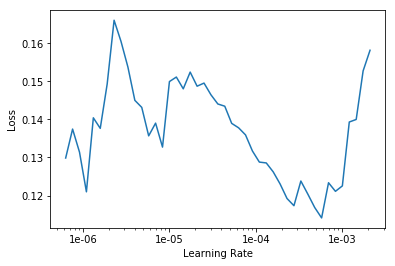

In [30]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.086395,0.324732,0.071429,00:13
1,0.064312,0.261836,0.059524,00:14


In [36]:
learn.save('stage-2')

In [34]:
learn.load('stage-2');

In [37]:
learn.export()

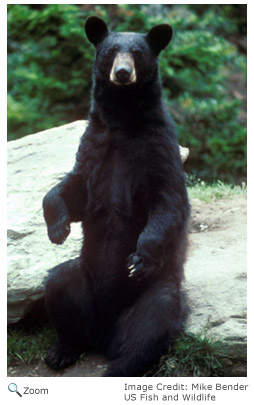

In [39]:
img = open_image(bear_images_path/'black'/'00000021.jpg')
img

#### We create our Learner in production enviromnent like this, just make sure that path contains the file 'export.pkl' from before.

In [45]:
learn = load_learner(bear_images_path)

In [46]:
pred_class, pred_indexes, outputs = learn.predict(img)
pred_class

Category black

In [48]:
# Learning rate too HIGH
learn = cnn_learner(bear_data_bunch, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,20.268215,154470176.000000,0.642857,00:13


In [51]:
# Learning rate too LOW
learn = cnn_learner(bear_data_bunch, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.299562,2.190422,0.773810,00:11
1,2.241808,1.663416,0.750000,00:12
2,2.267864,1.526786,0.726190,00:12
3,2.267936,1.482347,0.666667,00:11
4,2.223632,1.486938,0.690476,00:14


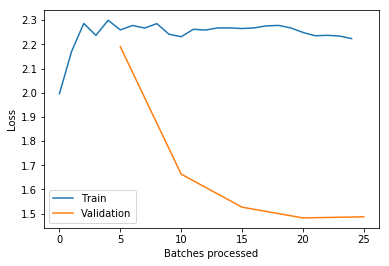

In [52]:
learn.recorder.plot_losses()